<a href="https://colab.research.google.com/github/IamNaQi/DLCutils/blob/master/Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

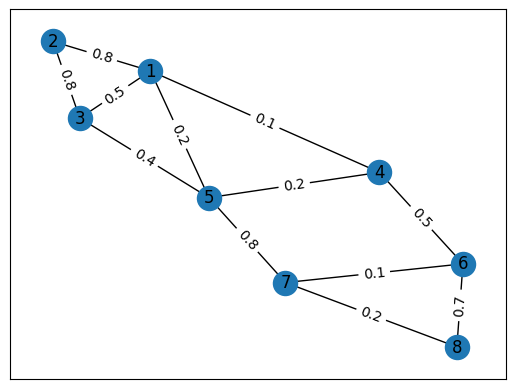

In [ ]:
import numpy as np
from scipy import linalg
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import networkx as nx

# Define adjacency matrix
adj_matrix = np.array([
    [0, 0.8, 0.5, 0.1, 0.2, 0, 0, 0],
    [0.8, 0, 0.8, 0, 0, 0, 0, 0],
    [0.5, 0.8, 0, 0, 0.4, 0, 0, 0],
    [0.1, 0, 0, 0, 0.2, 0.5, 0, 0],
    [0.2, 0, 0.4, 0.2, 0, 0, 0.8, 0],
    [0, 0, 0, 0.5, 0, 0, 0.1, 0.7],
    [0, 0, 0, 0, 0.8, 0.1, 0, 0.2],
    [0, 0, 0, 0, 0, 0.7, 0.2, 0]
])

# draw the graph
G = nx.Graph()

for i in range(adj_matrix.shape[0]):
    for j in range(adj_matrix.shape[1]):
        if adj_matrix[i, j] > 0:  # if there is an edge
            G.add_edge(i+1, j+1, weight=adj_matrix[i, j])

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

# draw edge labels
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


In [ ]:
# Calculate degree matrix
degree_matrix = np.diag(np.sum(adj_matrix, axis=1))

# Calculate unnormalized Laplacian
laplacian = degree_matrix - adj_matrix

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = linalg.eigh(laplacian)

# Sort eigenvectors based on their corresponding eigenvalues
eigenvectors = eigenvectors[:, np.argsort(eigenvalues)]

# Select k smallest eigenvectors
k = 3
eigenvectors = eigenvectors[:, :k]

# Apply k-means clustering
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(eigenvectors)

print("Cluster assignments:", clusters)


Cluster assignments: [0 0 0 2 1 2 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
def compute_ratiocut(adj_matrix, clusters):
    n = adj_matrix.shape[0]
    cut = 0
    for i in range(n):
        for j in range(n):
            if clusters[i] != clusters[j]:
                cut += adj_matrix[i, j]
    sizes = np.bincount(clusters)
    ratiocut = cut / sizes.sum()
    return ratiocut

ratiocut = compute_ratiocut(adj_matrix, clusters)
print("RatioCut value:", ratiocut)


RatioCut value: 0.30000000000000004


In [ ]:
def compute_ncut(adj_matrix, clusters):
    degree_matrix = np.diag(np.sum(adj_matrix, axis=1))
    cut = 0
    vol = 0
    for i in range(adj_matrix.shape[0]):
        for j in range(adj_matrix.shape[1]):
            if clusters[i] != clusters[j]:
                cut += adj_matrix[i, j]
        vol += degree_matrix[i, i]
    ncut = cut / vol
    return ncut

ncut = compute_ncut(adj_matrix, clusters)
print("NormalizedCut value:", ncut)


NormalizedCut value: 0.22641509433962265
